In [1]:
#Data set of facebook  10 years Weekly
#MODEL tried 
#1 Linear regression
#2 ridge regression
#3 Lasso regression
#4 decision trees
#5 Random Forest

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv("C:/Users/manish/Downloads/FB.csv")

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-06-04,27.000000,27.760000,26.150000,27.100000,27.100000,64193500
1,2012-06-11,27.180000,30.100000,26.840000,30.010000,30.010000,121558000
2,2012-06-18,29.959999,33.450001,29.410000,33.049999,33.049999,186090800
3,2012-06-25,32.860001,33.439999,30.760000,31.100000,31.100000,115019800
4,2012-07-02,31.250000,31.900000,30.549999,31.730000,31.730000,43863300


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       471 non-null    object 
 1   Open       471 non-null    float64
 2   High       471 non-null    float64
 3   Low        471 non-null    float64
 4   Close      471 non-null    float64
 5   Adj Close  471 non-null    float64
 6   Volume     471 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 25.9+ KB


In [6]:
# extracting year and Month from Date object

In [7]:
date=pd.to_datetime(df['Date'])

In [8]:
date

0     2012-06-04
1     2012-06-11
2     2012-06-18
3     2012-06-25
4     2012-07-02
         ...    
466   2021-05-10
467   2021-05-17
468   2021-05-24
469   2021-05-31
470   2021-06-07
Name: Date, Length: 471, dtype: datetime64[ns]

In [9]:
df['Year']=date.dt.year

In [10]:
df['Month']=date.dt.month

In [11]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month
0,2012-06-04,27.000000,27.760000,26.150000,27.100000,27.100000,64193500,2012,6
1,2012-06-11,27.180000,30.100000,26.840000,30.010000,30.010000,121558000,2012,6
2,2012-06-18,29.959999,33.450001,29.410000,33.049999,33.049999,186090800,2012,6
3,2012-06-25,32.860001,33.439999,30.760000,31.100000,31.100000,115019800,2012,6
4,2012-07-02,31.250000,31.900000,30.549999,31.730000,31.730000,43863300,2012,7
...,...,...,...,...,...,...,...,...,...
466,2021-05-10,314.350006,316.850006,298.190002,315.940002,315.940002,105129700,2021,5
467,2021-05-17,313.549988,319.929993,303.570007,316.230011,316.230011,79951000,2021,5
468,2021-05-24,318.209991,333.779999,318.029999,328.730011,328.730011,75084400,2021,5
469,2021-05-31,330.149994,332.459991,323.480011,330.350006,330.350006,49313200,2021,5


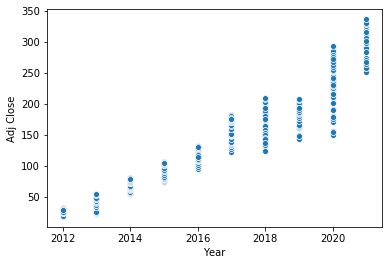

In [12]:
sns.scatterplot(x='Year',y='Adj Close',data=df)

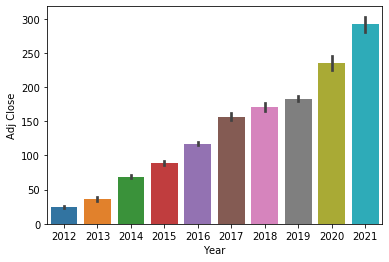

In [14]:
sns.barplot(x='Year',y='Adj Close',data=df)
# As the year increases the close price is also increasing 

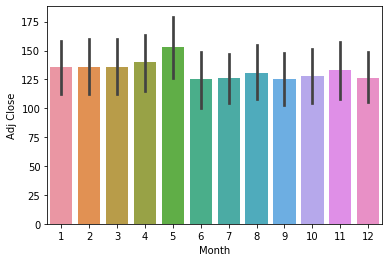

In [16]:
sns.barplot(x='Month',y='Adj Close',data=df)
# starting 5 month have more closing price than rest 
#this matches with AMAzon and APPLE 
#i don't know any specific reason for that why this occuring

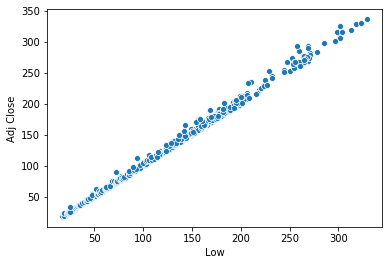

In [17]:
sns.scatterplot(x='Low',y='Adj Close',data=df)

In [18]:
#  the Adj close price has  linear relationship with Low

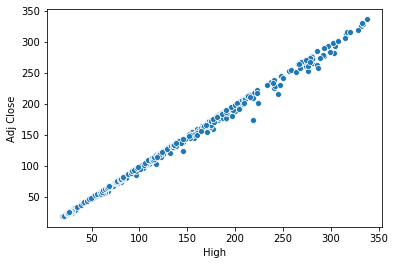

In [19]:
sns.scatterplot(x='High',y='Adj Close',data=df)

In [20]:
#  high also has nice linear relationship with Adj close

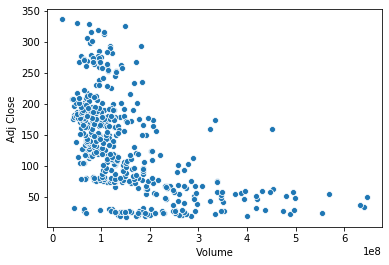

In [21]:
sns.scatterplot(x="Volume",y="Adj Close",data=df)
#no nice relation with Volume

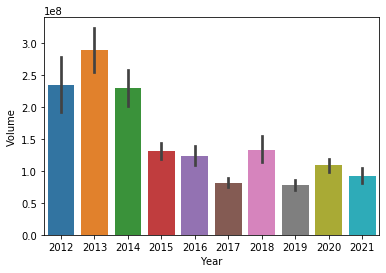

In [23]:
sns.barplot(x='Year',y='Volume',data=df)
# this is different from amazon 
#its volume is decresing with Time with few up and downs

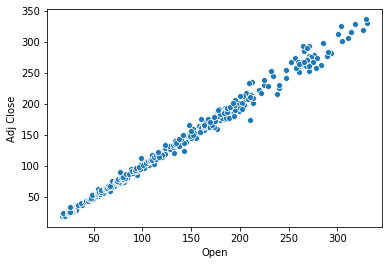

In [24]:
sns.scatterplot(x="Open",y='Adj Close',data=df)

In [25]:
#linear relationship with open price also

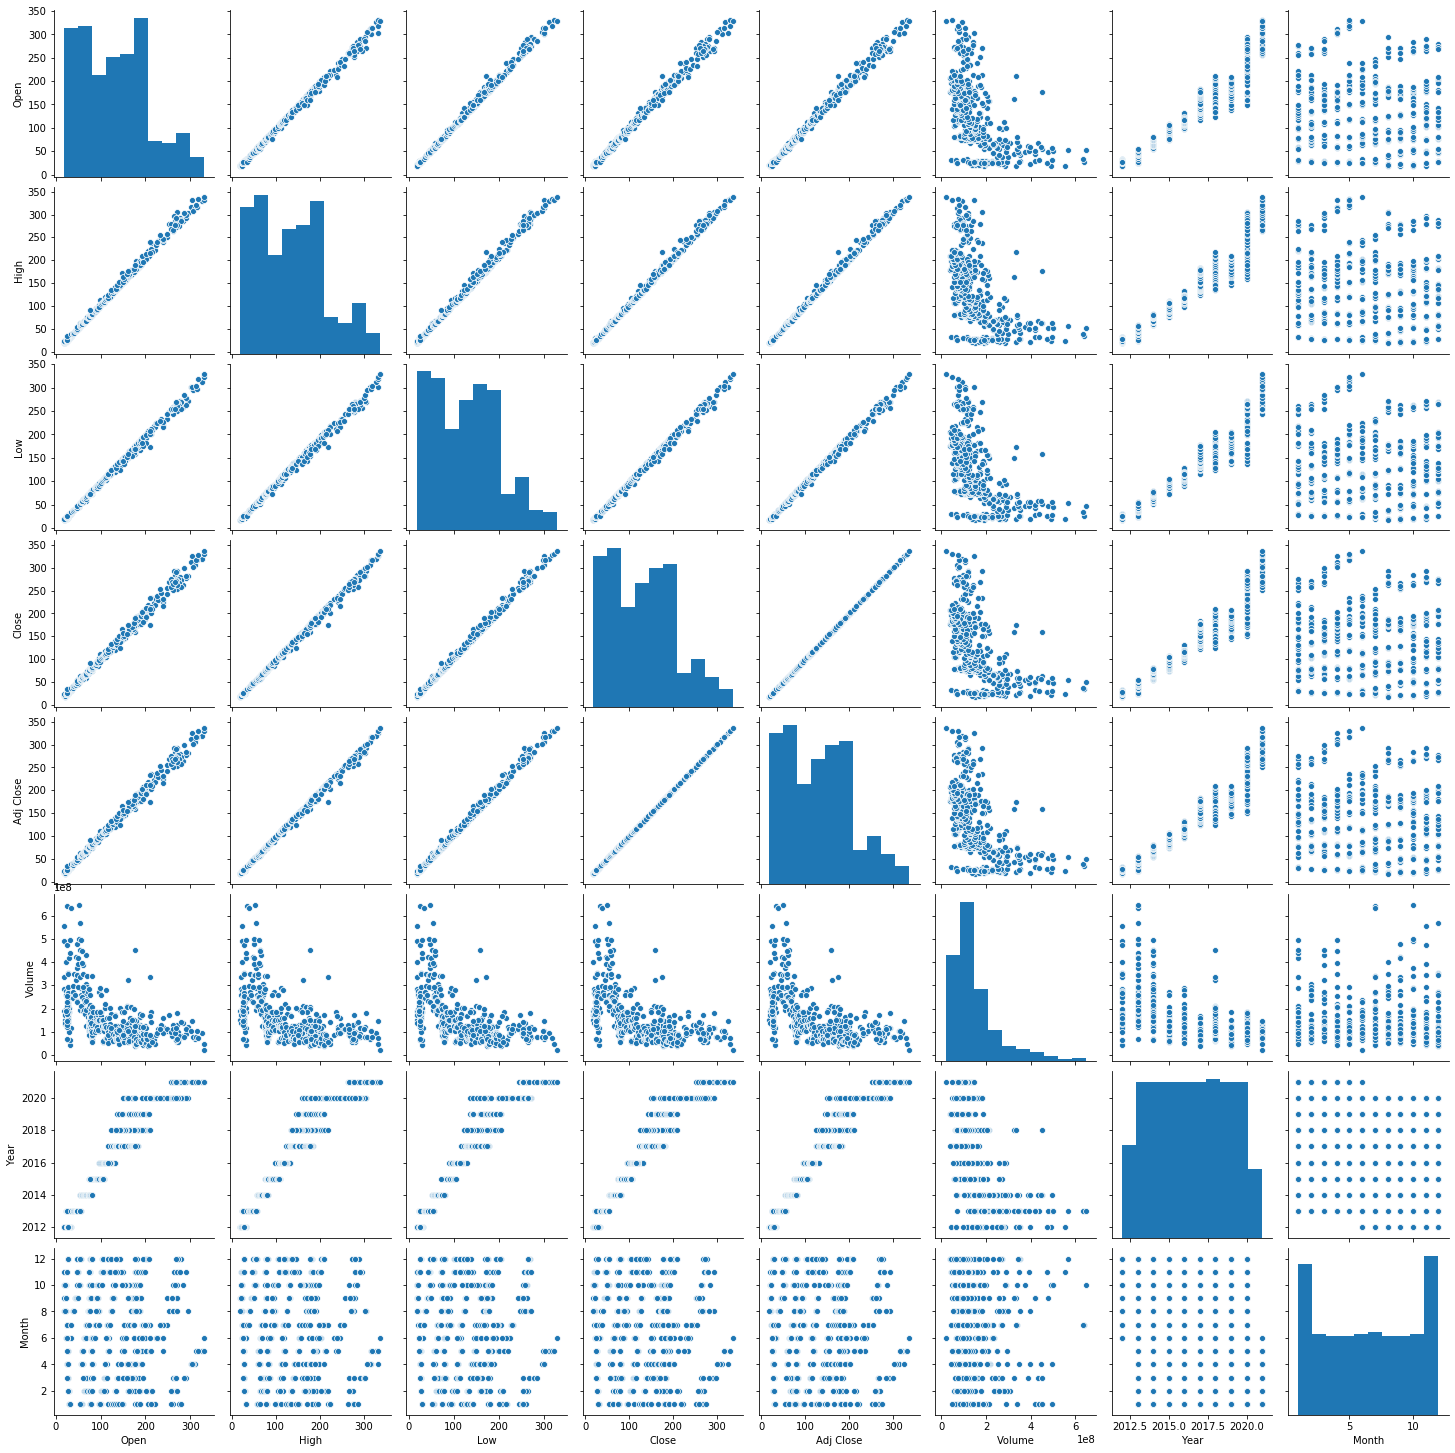

In [26]:
sns.pairplot(df)

In [27]:
#close or adj close are same so w have to drop close
# dropping Date also as we have extracted year and month from it

In [28]:
df.drop('Close',axis=1,inplace=True)

In [29]:
df

,Date,Open,High,Low,Adj Close,Volume,Year,Month
0,2012-06-04,27.000000,27.760000,26.150000,27.100000,64193500,2012,6
1,2012-06-11,27.180000,30.100000,26.840000,30.010000,121558000,2012,6
2,2012-06-18,29.959999,33.450001,29.410000,33.049999,186090800,2012,6
3,2012-06-25,32.860001,33.439999,30.760000,31.100000,115019800,2012,6
4,2012-07-02,31.250000,31.900000,30.549999,31.730000,43863300,2012,7
...,...,...,...,...,...,...,...,...
466,2021-05-10,314.350006,316.850006,298.190002,315.940002,105129700,2021,5
467,2021-05-17,313.549988,319.929993,303.570007,316.230011,79951000,2021,5
468,2021-05-24,318.209991,333.779999,318.029999,328.730011,75084400,2021,5
469,2021-05-31,330.149994,332.459991,323.480011,330.350006,49313200,2021,5


In [30]:
df.drop('Date',axis=1,inplace=True)

In [31]:
df

,Open,High,Low,Adj Close,Volume,Year,Month
0,27.000000,27.760000,26.150000,27.100000,64193500,2012,6
1,27.180000,30.100000,26.840000,30.010000,121558000,2012,6
2,29.959999,33.450001,29.410000,33.049999,186090800,2012,6
3,32.860001,33.439999,30.760000,31.100000,115019800,2012,6
4,31.250000,31.900000,30.549999,31.730000,43863300,2012,7
...,...,...,...,...,...,...,...
466,314.350006,316.850006,298.190002,315.940002,105129700,2021,5
467,313.549988,319.929993,303.570007,316.230011,79951000,2021,5
468,318.209991,333.779999,318.029999,328.730011,75084400,2021,5
469,330.149994,332.459991,323.480011,330.350006,49313200,2021,5


In [32]:
#as no data is missing so we donot have to deal with missing Data

In [33]:
#TEST TRAIN SPLIT

In [34]:
X=df[['Open',"High",'Low','Volume','Year','Month']]
y=df['Adj Close']

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=47)

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
model1=LinearRegression()

In [39]:
model1.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
# EVALUATING our model

In [41]:
model1.intercept_

-600.6815825014598

In [42]:
model1.coef_

array([-6.39174267e-01,  8.48572566e-01,  7.79651342e-01,  2.83727027e-10,
        2.98669068e-01, -2.01769982e-02])

In [43]:
#PREDICTIONS of our model

In [44]:
predictions = model1.predict(X_test)

In [45]:
predictions

array([273.59733774, 183.90217971, 133.61242871,  25.89556422,
       330.64645106, 195.66347508, 127.75962685,  31.31956462,
       106.58050183,  81.40823297, 142.31114142,  46.86399603,
       101.96819633, 170.32398562,  30.29136947,  73.52334086,
       270.5973079 ,  28.35053909,  31.84280632, 174.73738364,
        80.93102377,  69.81305972, 177.85160601,  23.41611095,
        83.21817201, 175.28829802, 258.98880983, 170.41632638,
       148.97605615, 204.51790225, 113.00995708,  18.71874227,
       163.49890426, 164.17920054,  27.68119143,  22.13913468,
       206.51918686,  81.52977989, 181.07216649, 283.63905288,
       139.78035345, 270.07536752, 288.71104513, 136.55710783,
       188.9302239 ,  82.57812771, 218.11009786,  77.18232935,
       237.8087564 ,  74.77207988, 180.13359245, 183.84280771,
       179.6268406 , 175.9979759 ,  72.56009164, 184.53356483,
       186.02731256, 143.70502507,  58.60414071,  79.71629823,
        48.0658921 ,  50.46396634,  46.50900144, 183.92

In [46]:
predictions.shape

(118,)

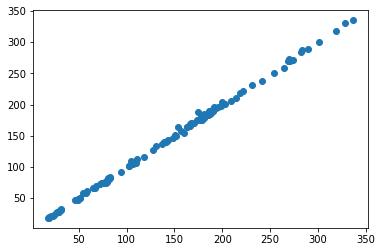

In [47]:
plt.scatter(y_test,predictions)

In [48]:
#Evaluation METRICS

In [49]:
from sklearn import metrics

In [50]:
 metrics.mean_absolute_error(y_test, predictions)

1.7221507090493355

In [51]:
metrics.mean_squared_error(y_test, predictions)

6.3439402145190735

In [52]:
(metrics.mean_squared_error(y_test, predictions))**0.5
#RMSE

2.5187179704204823

In [53]:

print(df['Adj Close'].max())
print(df['Adj Close'].min())
print(df['Adj Close'].mean())

336.579987
18.059998999999998
132.82845003397026


In [54]:
# Now we implement lasso regression 


In [55]:
from sklearn.linear_model import Lasso

In [56]:
model2=Lasso(max_iter=10000)

In [57]:
model2.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [58]:
predictions=model2.predict(X_test)

In [59]:
predictions

array([273.85473178, 183.33734546, 133.06945331,  25.91210103,
       329.52524746, 194.83951262, 127.37834629,  32.00871262,
       106.62413555,  81.08142139, 141.75684866,  47.32544955,
       101.60627129, 169.42149797,  30.2028041 ,  73.98199448,
       269.59756239,  28.25182065,  31.62756944, 174.47011901,
        81.08526999,  69.94685558, 178.00030596,  23.82214221,
        82.92480918, 175.96477609, 259.37228436, 170.63668036,
       149.22652019, 204.00205076, 112.55387945,  19.01708836,
       162.91587636, 163.81980379,  28.58931222,  22.46827211,
       206.59121758,  81.74475563, 180.82796465, 286.00834991,
       139.68148623, 269.50785773, 286.94323199, 137.22356087,
       188.99648011,  82.36365671, 216.6489759 ,  77.42101331,
       239.07470726,  74.7641922 , 180.71755926, 183.64390726,
       178.83092336, 175.96235324,  72.99426137, 183.93251585,
       185.83106823, 143.11204621,  58.69715288,  79.60664084,
        48.10589596,  50.38378257,  46.91968831, 183.06

In [60]:
predictions.shape

(118,)

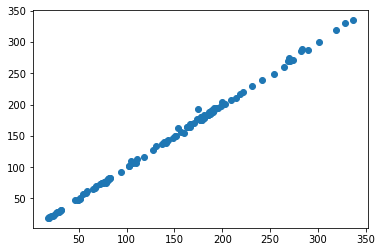

In [61]:
plt.scatter(x=y_test,y=predictions)

In [62]:
# evaluating the model

In [63]:
model2.intercept_

0.5118156942528742

In [64]:
model2.coef_

array([-4.57635837e-01,  8.10758570e-01,  6.41805551e-01, -1.20778927e-09,
        0.00000000e+00, -0.00000000e+00])

In [65]:
# comparing this with linear regression 
# it help in reducing unwanted dimension from data by assigning it to 0
#In this example it is visible that coeff of  year and month became zero

In [66]:
from sklearn import metrics

In [67]:
metrics.mean_absolute_error(y_test, predictions)

1.8097084988241683

In [68]:
metrics.mean_squared_error(y_test, predictions)

7.393096028556639

In [69]:
Rmse=metrics.mean_squared_error(y_test, predictions)**0.5
Rmse

2.719024830441355

In [70]:
# now use ridge regression 
# it is quite similar to Lasso but the extra term is  λ*|slope|^2

In [71]:
from sklearn.linear_model import Ridge

In [72]:
model3=Ridge()
# i normalise the value as it is giving warning due to some big values
# but after normalisation the result became worse than the average case 


In [73]:
model3.fit(X_train,y_train)

C:\Users\manish\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.01991e-17): result may not be accurate.
  overwrite_a=True).T


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [74]:
predictions=model3.predict(X_test)

In [75]:
predictions

array([273.59868324, 183.8989683 , 133.61162784,  25.89546401,
       330.64686524, 195.66150431, 127.75922371,  31.32284946,
       106.58091772,  81.40797653, 142.3104583 ,  46.86463634,
       101.96733017, 170.32106144,  30.29208087,  73.5242498 ,
       270.5953827 ,  28.35103273,  31.84364349, 174.73715107,
        80.93131113,  69.81452567, 177.85327485,  23.41714435,
        83.21793226, 175.28988927, 258.98997717, 170.41753871,
       148.97679073, 204.51625355, 113.00918917,  18.71983656,
       163.49452391, 164.17708262,  27.68477658,  22.14033583,
       206.51822236,  81.53032429, 181.07078513, 283.64617103,
       139.78052692, 270.07520255, 288.70806661, 136.55556555,
       188.93195498,  82.57756209, 218.10676938,  77.18256918,
       237.81160183,  74.77254937, 180.1334569 , 183.84156027,
       179.62371821, 175.99880461,  72.56164886, 184.5314732 ,
       186.02545075, 143.704072  ,  58.60449339,  79.71616359,
        48.06559494,  50.46386257,  46.50965421, 183.92

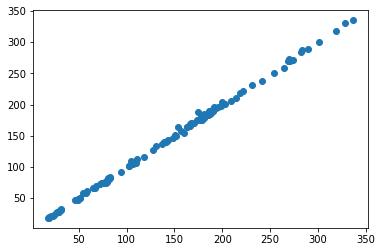

In [76]:
plt.scatter(x=y_test,y=predictions)

In [77]:
model3.intercept_

-596.4293362553983

In [78]:
model3.coef_
#ridge regression is helpful when we have shortage of data 

array([-6.38752277e-01,  8.48492925e-01,  7.79369814e-01,  2.78539794e-10,
        2.96556887e-01, -2.03549297e-02])

In [79]:
from sklearn import metrics

In [80]:
metrics.mean_absolute_error(y_test, predictions)

1.7220461829478384

In [81]:
metrics.mean_squared_error(y_test, predictions)

6.344230061170686

In [82]:
from sklearn.ensemble import RandomForestRegressor

In [83]:
model4=RandomForestRegressor()


In [84]:
model4.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [85]:
y_test

441    269.700012
383    184.190002
243    130.979996
57      25.910000
468    328.730011
          ...    
358    178.279999
12      18.059999
309    186.990005
132     79.879997
182    106.180000
Name: Adj Close, Length: 118, dtype: float64

In [86]:
predictions=model4.predict(X_test)

In [87]:
predictions

array([274.20679914, 182.26629944, 132.56019846,  24.76360021,
       324.13120358, 194.29400178, 127.87730196,  31.46119987,
       106.03149855,  80.1901002 , 140.65049704,  48.94730004,
       102.2422001 , 168.84320187,  31.46469945,  74.48929862,
       254.26400107,  27.87259979,  31.59079946, 176.11280086,
        80.27249991,  71.07130102, 179.16019742,  23.46849949,
        81.03779941, 177.5802022 , 266.68340119, 171.3758987 ,
       150.82390269, 204.11810221, 112.15729996,  19.47769988,
       163.59590155, 163.35209988,  29.55669973,  22.00699993,
       209.01210352,  80.26469996, 180.74779917, 293.96900259,
       140.36969701, 267.58119841, 274.08259913, 138.46279854,
       188.98670123,  81.07439936, 212.0194002 ,  77.60570129,
       240.89590519,  75.15509961, 180.93489895, 182.78819635,
       179.1961014 , 178.20629928,  74.40929938, 184.51669792,
       184.87249766, 141.08389827,  58.82199922,  78.9629009 ,
        47.70269939,  51.07190038,  47.72589921, 180.74

In [88]:
metrics.mean_absolute_error(y_test, predictions)

3.0492923894067863

In [89]:
metrics.mean_squared_error(y_test, predictions)

20.954329204987207

In [90]:
df
# now lets look assume adj_close =low+high /2 


,Open,High,Low,Adj Close,Volume,Year,Month
0,27.000000,27.760000,26.150000,27.100000,64193500,2012,6
1,27.180000,30.100000,26.840000,30.010000,121558000,2012,6
2,29.959999,33.450001,29.410000,33.049999,186090800,2012,6
3,32.860001,33.439999,30.760000,31.100000,115019800,2012,6
4,31.250000,31.900000,30.549999,31.730000,43863300,2012,7
...,...,...,...,...,...,...,...
466,314.350006,316.850006,298.190002,315.940002,105129700,2021,5
467,313.549988,319.929993,303.570007,316.230011,79951000,2021,5
468,318.209991,333.779999,318.029999,328.730011,75084400,2021,5
469,330.149994,332.459991,323.480011,330.350006,49313200,2021,5


In [91]:
df['Avg']=(df['Low']+df['High'])/2

In [92]:
df

,Open,High,Low,Adj Close,Volume,Year,Month,Avg
0,27.000000,27.760000,26.150000,27.100000,64193500,2012,6,26.955000
1,27.180000,30.100000,26.840000,30.010000,121558000,2012,6,28.470000
2,29.959999,33.450001,29.410000,33.049999,186090800,2012,6,31.430000
3,32.860001,33.439999,30.760000,31.100000,115019800,2012,6,32.100000
4,31.250000,31.900000,30.549999,31.730000,43863300,2012,7,31.224999
...,...,...,...,...,...,...,...,...
466,314.350006,316.850006,298.190002,315.940002,105129700,2021,5,307.520004
467,313.549988,319.929993,303.570007,316.230011,79951000,2021,5,311.750000
468,318.209991,333.779999,318.029999,328.730011,75084400,2021,5,325.904999
469,330.149994,332.459991,323.480011,330.350006,49313200,2021,5,327.970001


In [93]:
metrics.mean_absolute_error(df['Adj Close'],df['Avg'])

2.2668050976645433

In [94]:
metrics.mean_squared_error(df['Adj Close'],df['Avg'])

11.417378649936332

In [95]:
# 5th model is Decision trees

In [96]:
from sklearn.tree import DecisionTreeRegressor

In [97]:
model5=DecisionTreeRegressor()

In [98]:
model5.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [99]:
predictions=model5.predict(X_test)

In [100]:
predictions

array([276.399994, 185.669998, 131.729996,  24.370001, 330.350006,
       195.850006, 129.070007,  31.719999, 103.949997,  80.540001,
       140.339996,  47.529999, 104.57    , 169.600006,  31.719999,
        73.629997, 252.529999,  28.32    ,  31.719999, 175.720001,
        79.190002,  75.949997, 177.199997,  21.09    ,  81.529999,
       175.100006, 259.940002, 172.229996, 152.130005, 206.300003,
       110.629997,  19.41    , 153.610001, 164.429993,  30.01    ,
        21.09    , 209.940002,  80.540001, 180.449997, 293.660004,
       140.339996, 267.399994, 284.790009, 124.949997, 193.990005,
        81.529999, 210.179993,  77.440002, 230.710007,  74.82    ,
       177.100006, 185.669998, 179.100006, 175.729996,  75.949997,
       183.699997, 183.699997, 140.779999,  58.939999,  78.970001,
        47.529999,  53.32    ,  47.939999, 183.289993, 137.949997,
       233.419998, 175.729996, 182.679993, 254.820007,  74.82    ,
       298.660004, 330.350006,  27.780001, 325.079987,  92.769

In [104]:
metrics.mean_absolute_error(y_test, predictions)


3.448644127118645

In [105]:
metrics.mean_squared_error(y_test, predictions)

27.65096519545945

In [106]:
# Comparing ALL models

In [107]:
# 1 comparing mean absolute error
model_name=['Linear Regression','Lasso Regression','Ridge Regression','Random forest regressor','Decision tree regressor','Avg of low high']

<BarContainer object of 6 artists>

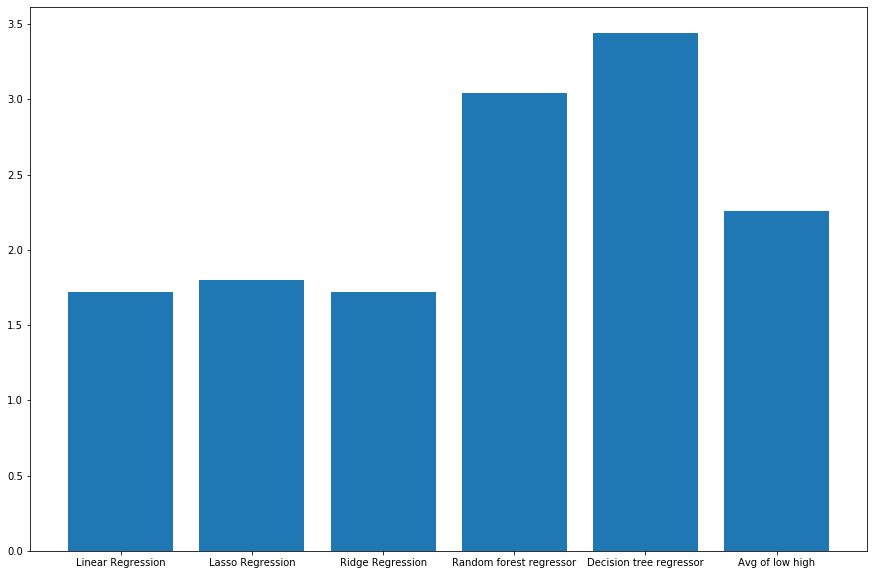

In [108]:
MAE=[1.72,1.8,1.72,3.04,3.44,2.26]
plt.figure(figsize=(15,10))
plt.bar(model_name,MAE)

<BarContainer object of 6 artists>

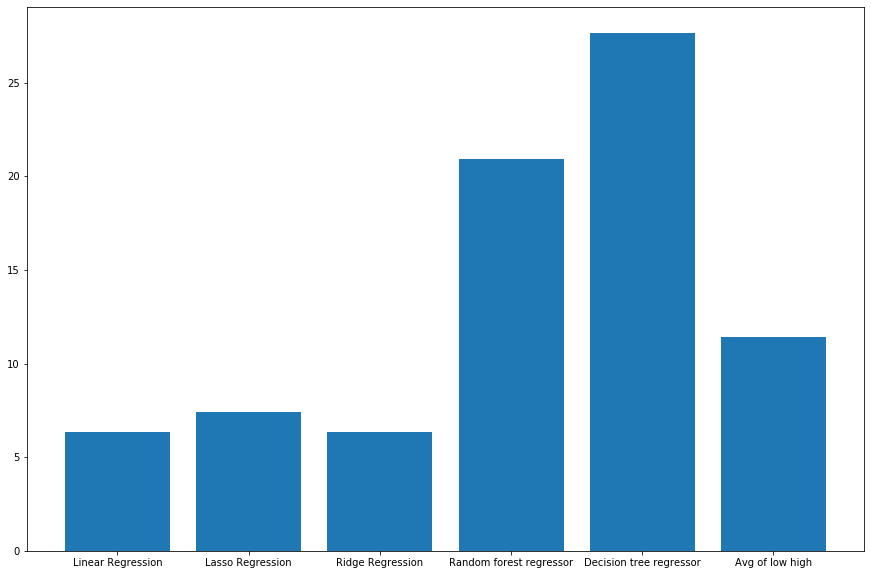

In [109]:
MSE=[6.34,7.39,6.34,20.95,27.65,11.4]
plt.figure(figsize=(15,10))
plt.bar(model_name,MSE)

<BarContainer object of 6 artists>

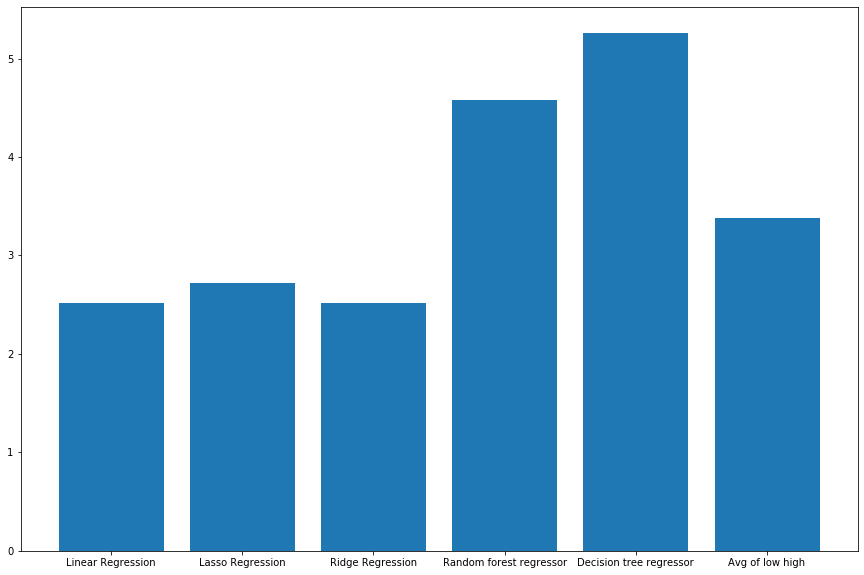

In [110]:

RMSE=list(map(np.sqrt,MSE))
RMSE
plt.figure(figsize=(15,10))
plt.bar(model_name,RMSE)

In [111]:
# by analysing All the graphs we can say that linear regression and ridge regression performs quite similar
#Decision trees and random forest regressor performed very poor.both are below average.